## Hergarten linear model for the part of the total precipitation that is converted into ice

### Input Variables and pIce calculation

In [2]:
import numpy as numpy

In [140]:
# Rainfall
precip = 1

# Surface Height of the Point
# h = hSur
hSur = 2500

# Equilibrium Line Altitude
hEla = 2000

# Elevation where all precipitation is Ice
# This is traditionally higher than hELA -> example provided uses hIce 2500 to hEla 2000
# hF = hIce
hIce = 3000

# Define the Variable
pIce = 0

# Calculate pIRatio using the inverted parabolic function
if hSur >= hIce:
        pIRatio = 1
elif hEla <= hSur < hIce:
    # Normalize hSur to a range between 1 and 10
    norm_hSur = 1 + 9 * (hSur - hEla) / (hIce - hEla)
    # Apply the negative log scale and reverse it
    pIRatio = np.log10(norm_hSur)
else:
    pIRatio = 0

pIce = precip * pIRatio

print(f"Percentage Ice (pIce) value: ", pIce)

Percentage Ice (pIce) value:  0.7403626894942439


### Check for Negative Values

In [2]:
#Above, Below, or within the Water/Ice Transition Zone
if pIce < 0: 
    print("Below the ELA")
elif hSur > hIce:
    print("Significantly above the ELA")
else:
    print("Above the ELA, within the transition zone")

Significantly above the ELA


In [3]:
#Protect Against Negative pIce and pIRatio
if hSur <= hEla:
    pIce = 0
    pIRatio = 0
elif hSur > hIce:
    pIRatio = 1
 
#Return pIce
print(f"Ratio is: " + str(pIRatio))
print(f"IceFlux is still: " + str(pIce))

Ratio is: 1
IceFlux is still: 1


### Iceflow Calculator

In [4]:
#Area
Area = 10

#Printer
print(f"Arbitrary Define of Area as: " + str(Area))

Arbitrary Define of Area as: 10


In [5]:
#Calculate Iceflow
Iceflow = (pIRatio * precip * Area)

#Print Iceflow
print(f"Iceflow at node: " + str(Iceflow))

Iceflow at node: 10


### Further Rain Calculation

In [7]:
#Rain and Ice Ratio
print("Ratio of Rain to Ice: " + str(float(1 - pIRatio)))

Ratio of Rain to Ice: 0.0


In [8]:
# pRain using the area
pRain = (precip * Area)

#Redo
print(f"Original pRain on node: " + str(pRain))

Original pRain on node: 10


In [9]:
# Rain 
Rain = precip

#Redo
print(f"Precipitation on node: " + str(Rain))

Precipitation on node: 1


In [10]:
#Recalculate Rain using the ratio of IceFlow
new_precip = ((1 - pIRatio) * precip * Area)

#Redo
print(f"New pRain on node: " + str(new_precip))

New pRain on node: 0


### Difference

In [11]:
print(f"pRain (WaterFlux) on node: " + str(new_precip))
print(f"pIce (Iceflow) at node: " + str(Iceflow))

pRain (WaterFlux) on node: 0
pIce (Iceflow) at node: 10


#### Ablation Testing

In [12]:
#Define
pAbRatio = 0

pAbRatio = (1 - numpy.abs((hSur - hEla)/(hIce - hEla)))

if hSur >= hEla:
    pAbRatio = 0
elif hSur < hEla - (hSur - hEla):
    print(f"Ablation Zone, elevation = " + str(hSur))

In [13]:
print(f"Ablation Ratio: " + str(pAbRatio))

Ablation Ratio: 0


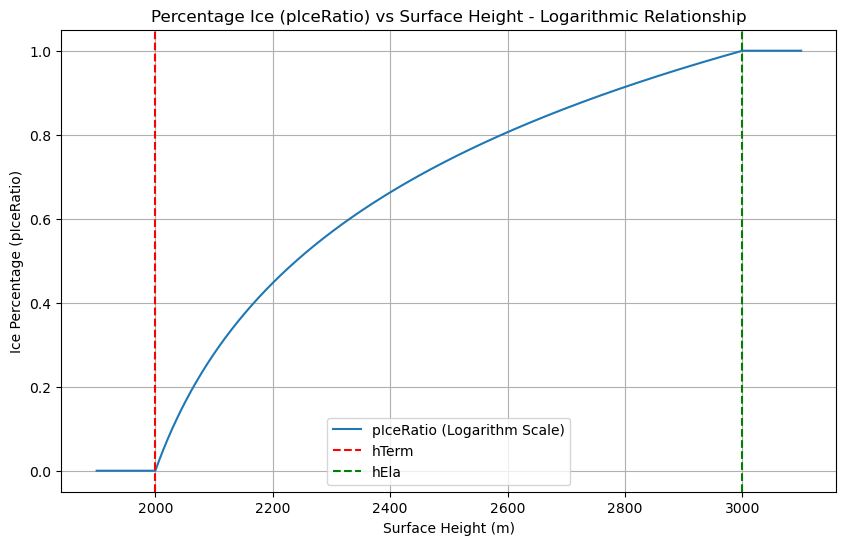

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
precip = 1
hEla = 2000
hIce = 3000

# Generate hSur values
hSur_values = np.arange(1900, 3101)

# Calculate pIRatio using a logarithmic function
def calculate_pIRatio_log(hSur, hEla, hIce):
    if hSur >= hIce:
        return 1
    elif hEla <= hSur < hIce:
        # Normalize hSur to a range between 1 and 10
        norm_hSur = 1 + 9 * (hSur - hEla) / (hIce - hEla)
        # Apply the negative log scale and reverse it
        return np.log10(norm_hSur)
    else:
        return 0

pIRatio_values = np.array([calculate_pIRatio_log(hSur, hEla, hIce) for hSur in hSur_values])

# Constrain pIRatio between 0 and 1
pIRatio_values = np.clip(pIRatio_values, 0, 1)

# Calculate pIce
pIce_values = precip * pIRatio_values

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(hSur_values, pIce_values, label='pIceRatio (Logarithm Scale)')
plt.xlabel('Surface Height (m)')
plt.ylabel('Ice Percentage (pIceRatio)')
plt.title('Percentage Ice (pIceRatio) vs Surface Height - Logarithmic Relationship')
plt.axvline(x=hEla, color='r', linestyle='--', label='hTerm')
plt.axvline(x=hIce, color='g', linestyle='--', label='hEla')
plt.legend()
plt.grid(True)
plt.show()


# Computing Flow - Iceflow and Riverflow

In [2]:
# Import Everything
from badlands import flowalgo
import numpy
%matplotlib inline
import matplotlib.pyplot as plt 
from scripts import morphoGrid as morph
from badlands.model import Model as badlandsModel
from matplotlib import path

In [3]:
# Run Model for Data (For outputs)
model = badlandsModel()
model.load_xml('input.xml')
model.run_to_time(10)

Hey Matt!, this is the badlands-workspace instance. Now with glaciers!
Glaciers Found
hTerm:  3116.0
hEla:  3739.0
KIce:  5e-06
smth:  1.0
ice_max:  100.0
ice_spread:  85.0
   - Writing outputs (0.10 seconds; tNow = 0.0)
tNow = 10 (0.15 seconds)
   - Writing outputs (0.07 seconds; tNow = 10)


In [7]:
plt.(model.flow.discharge)

SyntaxError: invalid syntax (2846278439.py, line 1)

In [5]:
# Load info for computing in flow
# Area of nodes
areaModel = model.FVmesh.control_volumes.copy()

# Elevation of Nodes
zMesh = model.elevation.copy()

# Sea level? at nodes?
sealev = model.force.sealevel

# Rain (precip) on each node
rain = model.rain.copy()

#OLD HTERMINUS
hEla = 5000

#OLD HELA
hIce = 6000

### Original Discharge Function

In [12]:
def compute_flow(model, sealevel, elev, Acell, rain):
        """
        Calculates the **drainage area** and **water discharge** at each node.

        Args:
            elev: numpy arrays containing the elevation of the TIN nodes.
            Acell: numpy float-type array containing the voronoi area for each nodes (in :math:`{m}^2`).
            rain: numpy float-type array containing the precipitation rate for each nodes (in :math:`{m/a}`).
        """

        numPts = len(Acell)

        discharge = numpy.zeros(numPts, dtype=float)
        discharge[model.flow.stack] = Acell[model.flow.stack] * rain[model.flow.stack]

        # Compute discharge using libUtils
        discharge, activelay = flowalgo.discharge(
            sealevel, model.flow.localstack, model.flow.receivers, elev, discharge
        )

        return discharge

In [13]:
discharge = compute_flow(model, sealev, zMesh, areaModel, rain)

In [14]:
discharge.max()

587452510.1554013

#### Visualize Original Discharge

In [15]:
morpho = morph.morphoGrid(folder='output_eualps_test/h5', bbox = [0,0,100000,50000], dx=100)

morpho.loadHDF5(timestep=0,discharge2=discharge)
raindischarge = morpho.discharge.copy()

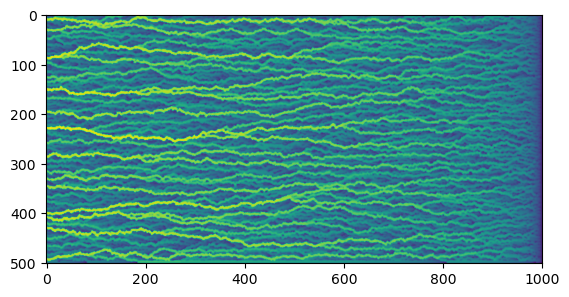

In [16]:
plt.imshow(numpy.log(morpho.discharge))

### Ice flow Function

In [31]:
def cmptIceflow(model,elev,area,sealevel,hEla,hIce,rain,smth=0.2):

    #Find Size of Array
    numPts = len(area)

    #Create Arrays of equal size to Original, empty
    pIce = numpy.zeros(numPts, dtype=float)
    discharge = numpy.zeros(numPts, dtype=float)

    #Calculate the Ratio for Water/Ice Transition
    pIRatio = (elev - hEla)/(hIce - hEla)

    #pICE Full Calculation
    pIce = rain * numpy.minimum(pIRatio, 1)

    # Set pIce and pIRatio to 0 where elev is below or equal to hEla
    pIRatio = numpy.where(elev <= hEla, 0, pIRatio)
    pIce = numpy.where(elev <= hEla, 0, pIce)

    # Set pIRatio to 1 where elev is above hIce
    pIRatio = numpy.where(elev > hIce, 1, pIRatio)

    #Adjusted using pIRatio
    discharge[model.flow.stack] = pIRatio * area[model.flow.stack] * rain[model.flow.stack]
    pIce =  discharge[model.flow.stack].copy()

    # Compute discharge using libUtils
    icedischarge, activelay = flowalgo.discharge(sealev, model.flow.localstack, model.flow.receivers, elev, pIce)

    #This controls the extra runoff which appears. Uncomment to limit it.
    icedischarge_ela = numpy.where(elev <= hEla, 0, icedischarge)
    icedischarge_riv = numpy.where(elev > hEla, 0, icedischarge)
    
    # Smoothing glacial flow accumulation above ELA
    smthFAi = model.flow._gaussian_diffusion(icedischarge_ela, smth)
    smthFAi = numpy.where(elev <= hEla, 0, smthFAi)
    #smthFAi = smthFAi * numpy.minimum(pIRatio, 1)
    smthFAi = icedischarge_ela

    return smthFAi, icedischarge_riv

In [9]:
def cmptIceflow(model, elev, area, sealevel, hEla, hIce, rain, smth=0.2):
    # Find size of array
    numPts = len(area)

    # Create arrays of equal size to original, empty
    discharge = np.zeros(numPts, dtype=float)
    
    pIRatio = np.where(
        hSur >= hIce,  # Condition for pIRatio = 1
        1,             # Value if condition is True
        np.where(
            (hEla <= hSur) & (hSur < hIce),  # Condition for 0 < pIRatio < 1
            np.log10(1 + 9 * (hSur - hEla) / (hIce - hEla)),  # Value if condition is True
            0  # Value if all conditions are False
        )
    )

    # Calculate discharge using pIRatio
    discharge[model.flow.stack] = pIRatio * area[model.flow.stack] * rain[model.flow.stack]
    pIce = discharge[model.flow.stack].copy()

    # Compute discharge using libUtils
    icedischarge, activelay = flowalgo.discharge(sealevel, model.flow.localstack, model.flow.receivers, elev, pIce)

    # This controls the extra runoff which appears. Uncomment to limit it.
    icedischarge_ela = np.where(elev <= hEla, 0, icedischarge)
    icedischarge_riv = np.where(elev > hEla, 0, icedischarge)

    # Smoothing glacial flow accumulation above ELA
    smthFAi = model.flow._gaussian_diffusion(icedischarge_ela, smth)
    smthFAi = np.where(elev <= hEla, 0, smthFAi)
    # smthFAi = smthFAi * np.minimum(pIRatio, 1)

    return smthFAi, icedischarge_riv


In [10]:
FA_ice, FA_ice_runoff = cmptIceflow(model,zMesh,areaModel,sealev,hEla,hIce,rain,1.8)

NameError: name 'zMesh' is not defined

### Visualize Function of Total Glacier Influence

In [122]:
morpho.loadHDF5(timestep=0,discharge2=FA_ice)
FA_icex = morpho.discharge.copy()

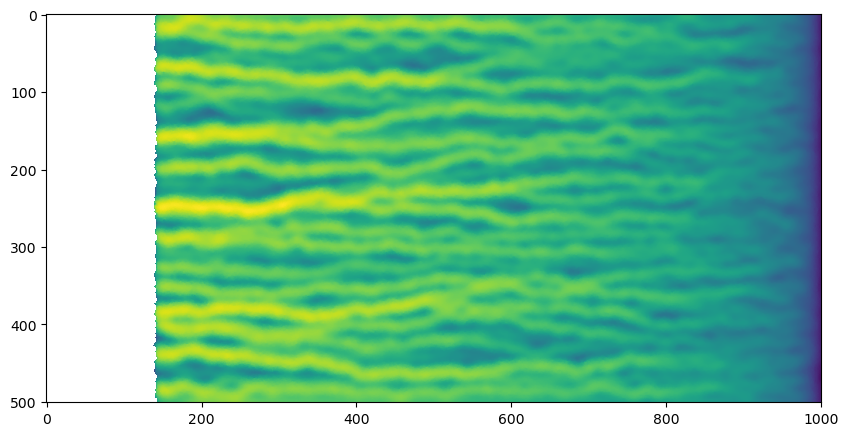

In [123]:
plt.figure(figsize=(10, 8))
plt.imshow(numpy.log(FA_icex))

### Visualize Runoff Only

In [124]:
morpho.loadHDF5(timestep=0,discharge2=FA_ice_runoff)
FA_iceRX = morpho.discharge.copy()

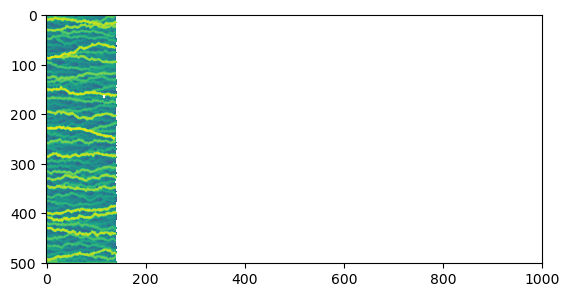

In [125]:
plt.imshow(numpy.log(FA_iceRX))

### River Flow Function


In [24]:
def cmptRiverflow(model,elev,area,sealevel,hEla,hIce,rain):

    #Find Size of Array
    numPts = len(areaModel)

    #Create Arrays of equal size to Original, empty
    pRiver = numpy.zeros(numPts, dtype=float)
    discharge = numpy.zeros(numPts, dtype=float)

    #Calculate the Ratio for Water/Ice Transition
    pIRatio = (elev - hEla)/(hIce - hEla)

    #pICE Full Calculation
    pIce = rain * numpy.minimum(pIRatio, 1)

    # Set pIce and pIRatio to 0 where elev is below or equal to hEla
    pIRatio = numpy.where(elev <= hEla, 0, pIRatio)
    pIce = numpy.where(elev <= hEla, 0, pIce)

    # Set pIRatio to 1 where elev is above hIce
    pIRatio = numpy.where(elev > hIce, 1, pIRatio)

    #Adjusted pRain calculation using pIRatio
    #pRiver = ((1 - pIRatio) * precip * Area)
    discharge[model.flow.stack] = (1 - pIRatio) * area[model.flow.stack] * rain[model.flow.stack]
    pRiver =  discharge[model.flow.stack].copy()

    # Compute discharge using libUtils
    riverdischarge, activelay = flowalgo.discharge(sealev, model.flow.localstack, model.flow.receivers, elev, pRiver)
    
    return riverdischarge

In [25]:
FA_River = cmptRiverflow(model,zMesh,areaModel,sealev,hEla,hIce,rain)

#### Visualize River Discharge

In [26]:
morpho.loadHDF5(timestep=0,discharge2=FA_River)
FA_Riverx = morpho.discharge.copy()

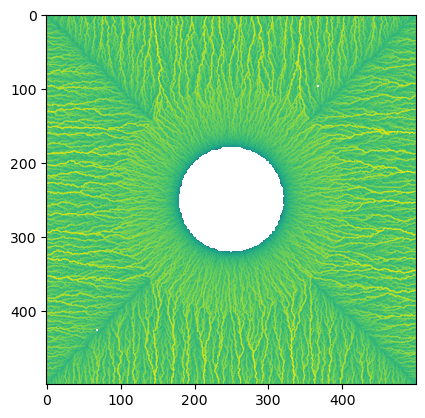

In [27]:
plt.imshow(numpy.log(FA_Riverx))

#### Combine Runoff and Rainfall into single equation

In [26]:
PercentageRunoff = 0.8

In [27]:
FA_RiverRun = FA_River + (PercentageRunoff * FA_ice_runoff)

In [30]:
morpho.loadHDF5(timestep=0,discharge2=FA_RiverRun)
FA_RiverRunx = morpho.discharge.copy()

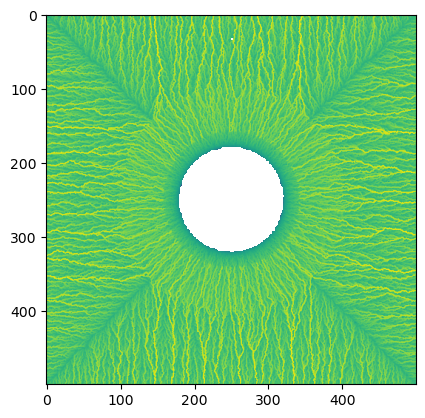

In [31]:
plt.imshow(numpy.log(FA_RiverRunx))

In [100]:
hELA = 5000
hIce = 6000

## Combined Total Flow Discharge Function

In [17]:
def cmptTotalflow(model,elev,area,sealevel,hEla,hIce,rain,smth=1.5,percGl=0.8):

    #Find Size of Array
    numPts = len(area)

    #Create Arrays of equal size to Original, empty
    pIce = numpy.zeros(numPts, dtype=float)
    discharge = numpy.zeros(numPts, dtype=float)

    #Calculate the Ratio for Water/Ice Transition
    pIRatio = (elev - hEla)/(hIce - hEla)

    #pICE Full Calculation
    pIce = rain * numpy.minimum(pIRatio, 1)

    # Set pIce and pIRatio to 0 where elev is below or equal to hEla
    pIRatio = numpy.where(elev <= hEla, 0, pIRatio)
    pIce = numpy.where(elev <= hEla, 0, pIce)

    # Set pIRatio to 1 where elev is above hIce
    pIRatio = numpy.where(elev > hIce, 1, pIRatio)

    #Adjusted using pIRatio
    discharge[model.flow.stack] = pIRatio * area[model.flow.stack] * rain[model.flow.stack]
    pIce =  discharge[model.flow.stack].copy()

    #River Discharge Model
    discharge[model.flow.stack] = (1 - pIRatio) * area[model.flow.stack] * rain[model.flow.stack]
    pRiver =  discharge[model.flow.stack].copy()

    # Compute discharge using libUtils
    raindischarge, activelay = flowalgo.discharge(sealev, model.flow.localstack, model.flow.receivers, elev, pRiver)
    
    # Compute discharge using libUtils
    icedischarge, activelay = flowalgo.discharge(sealev, model.flow.localstack, model.flow.receivers, elev, pIce)

    #This controls the extra runoff which appears. Uncomment to limit it.
    icedischarge_ela = numpy.where(elev <= hEla, 0, icedischarge)
    icedischarge_riv = numpy.where(elev > hEla, 0, icedischarge)

    # Smoothing glacial flow accumulation above ELA
    smthFAi = model.flow._gaussian_diffusion(icedischarge_ela, smth)
    smthFAi = numpy.where(elev <= hEla, 0, smthFAi)

    riverdischarge = (raindischarge + (percGl * icedischarge_riv))

    smthFA_total = riverdischarge + smthFAi
    
    return smthFAi, raindischarge, riverdischarge, smthFA_total

### Outputs for further Calculations

In [18]:
FA_Ice, FA_Rain, FA_RiverRun, FA_Total = cmptTotalflow(model,zMesh,areaModel,sealev,hEla,hIce,rain,1.4, 0.8)

In [19]:
FA_Ice.shape

(44503,)

## Visualize to Confirm Outputs

In [20]:
morpho.loadHDF5(timestep=0,discharge2=FA_Ice)
FA_Ice_plot = morpho.discharge.copy()

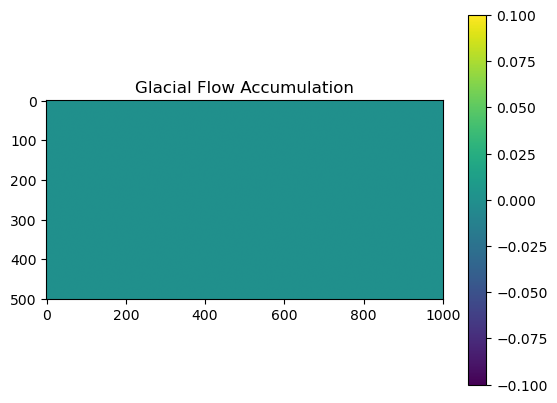

In [21]:
plt.title("Glacial Flow Accumulation")
plt.imshow(FA_Ice_plot)
plt.colorbar()

In [107]:
morpho.loadHDF5(timestep=0,discharge2=FA_RiverRun)
FA_RiverRun_plot = morpho.discharge.copy()

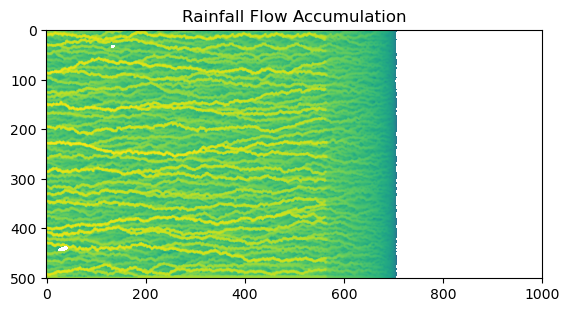

In [108]:
plt.title("Rainfall Flow Accumulation")
plt.imshow(numpy.log(FA_RiverRun_plot))

In [94]:
morpho.loadHDF5(timestep=0,discharge2=FA_RiverRun)
FA_RiverRun_plot = morpho.discharge.copy()

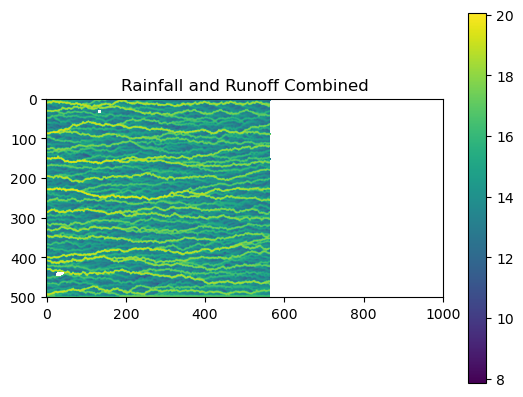

In [95]:
plt.title("Rainfall and Runoff Combined")
plt.imshow(numpy.log(FA_RiverRun_plot))
plt.colorbar()

In [75]:
morpho.loadHDF5(timestep=0,discharge2=FA_Total)
FA_Total_plot = morpho.discharge.copy()

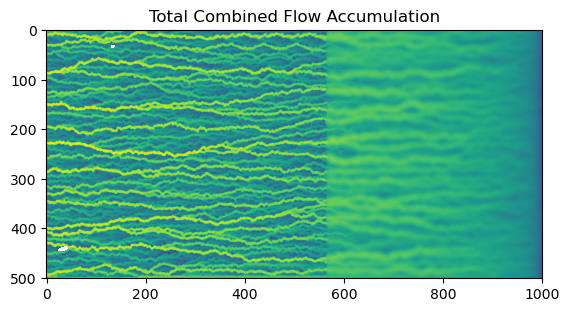

In [76]:
plt.title("Total Combined Flow Accumulation")
plt.imshow(numpy.log(FA_Total_plot))

### Checking HELA Working as intended

In [77]:
FA_Total.max()

521372919.99959326

In [78]:
morpho.loadHDF5(timestep=0,discharge2=FA_Total)
FA_Total_plotCHECK = morpho.discharge.copy()

In [79]:
morpho.loadHDF5(timestep=0,discharge2=FA_Ice)
FA_Ice_plotCHECK = morpho.discharge.copy()

In [80]:
morpho.loadHDF5(timestep=0,discharge2=FA_River)
FA_RiverRun_plotCHECK = morpho.discharge.copy()

NameError: name 'FA_River' is not defined

In [ ]:
plt.title("Total Combined Flow Accumulation")
plt.imshow(numpy.log(FA_Total_plotCHECK - FA_RiverRun_plotCHECK))

## Stream Power Erosion/Deposition Network

#### Simulate Input of Ice Parameter

In [31]:
# input: 
erosion_ratio = 5
KIce = 2.e-06 * erosion_ratio

In [32]:
#this would have to be defined somewhere
model.flow.eroIce = numpy.full(model.totPts, KIce)  

In [33]:
model.flow.eroIce

array([1.e-05, 1.e-05, 1.e-05, ..., 1.e-05, 1.e-05, 1.e-05])

In [34]:
def compute_sedflux(
        self,
        Acell,
        elev,
        rain,
        fillH,
        dt,
        actlay,
        rockCk,
        rivqs,
        sealevel,
        perc_dep,
        slp_cr,
        ngbh,
        verbose=False,
    ):
        """
        Calculates the **sediment flux** at each node.

        Args:
            Self = model

            Acell: numpy float-type array containing the voronoi area for each nodes (in :math:`{m}^2`)
            Acell = areaModel
            
            elev: numpy arrays containing the elevation of the TIN nodes.
            elev = Zmesh
            
            rain: numpy float-type array containing the precipitation rate for each nodes (in :math:`{m/a}`).
            rain = rain
            
            fillH: numpy array containing the lake elevations.

            
            dt: real value corresponding to the maximal stability time step.

            
            actlay: active layer composition.

            
            rockCk: rock erodibility values.

            
            rivqs: numpy arrays representing the sediment fluxes from rivers.

            
            sealevel: real value giving the sea-level height at considered time step.

            
            slp_cr: critical slope used to force aerial deposition for alluvial plain.

            
            perc_dep: maximum percentage of deposition at any given time interval.

            


        Returns
        -------
        erosion
            numpy array containing erosion thicknesses for each node of the TIN (in m).
        depo
            numpy array containing deposition thicknesses for each node of the TIN (in m).
        sedflux
            numpy array containing cumulative sediment flux on each node  (in :math:`{m}^3/{m}^2`).
        newdt
            new time step to ensure flow computation stability.

        """

        check = False

        # To be removed when written in badlands 
        ################################################
        actlay = None
        ids = numpy.arange(len(model.FVmesh.control_volumes))
        tmp1 = numpy.where(model.FVmesh.control_volumes > 0.0)[0]
        xyMin = [model.recGrid.regX.min() - 1.0, model.recGrid.regY.min() - 1.0]
        xyMax = [model.recGrid.regX.max() + 1.0, model.recGrid.regY.max() + 1.0]
        model.flow.domain = path.Path(
            [
                (xyMin[0], xyMin[1]),
                (xyMax[0], xyMin[1]),
                (xyMax[0], xyMax[1]),
                (xyMin[0], xyMax[1]),
            ]
        )
        tmp2 = model.flow.domain.contains_points(model.flow.xycoords)
        model.flow.insideIDs = numpy.intersect1d(tmp1, ids[tmp2])
        model.flow.borders = numpy.zeros(len(model.FVmesh.control_volumes), dtype=int)
        model.flow.borders[model.flow.insideIDs] = 1
        model.flow.outsideIDs = numpy.where(model.flow.borders == 0)[0]
        # model.flow.borders = np.zeros(len(model.FVmesh.control_volumes), dtype=int)

        print("Completed")
    
        ################################################
        
        newdt = numpy.copy(dt)

        if actlay is None:
            sedflux = numpy.zeros((len(elev), 1))
        else:
            sedflux = numpy.zeros((len(elev), len(rockCk)))

        # Compute sediment flux using libUtils
        # Stream power law
        if model.flow.spl:
            if verbose:
                time0 = time.process_time()
                time1 = time.process_time()

            # Find border/inside nodes
            if model.flow.mp > 0.0:
                if model.straTIN == 1:
                    rp = numpy.power(rain, model.flow_mp).reshape((len(zMesh), 1))
                    eroCoeff = rockCk * rp
                else:
                    eroCoeff = model.flow.erodibility * numpy.power(rain, model.flow.mp)
                    eroCoeff.reshape((len(zMesh), 1))
            else:
                if model.straTIN == 1:
                    eroCoeff = numpy.tile(rockCk, (len(zMesh), 1))
                else:
                    eroCoeff_River = model.flow.erodibility.reshape((len(zMesh), 1))
                    eroCoeff_Ice = model.flow.eroIce.reshape((len(zMesh), 1))
            if actlay is None:
                actlay = numpy.zeros((len(zMesh), 1))

            #RIVER Stream Power Application
            cdepo_river, cero_river, sedload_river, slopeTIN_river, flowdensity_river = flowalgo.streampower(
                model.flow.critdens,
                model.flow.localstack,
                model.flow.receivers,
                model.flow.pitID,
                model.flow.pitVolume,
                model.flow.pitDrain.astype(int),
                model.flow.xycoords,
                Acell,
                model.flow.maxh,
                model.flow.maxdep,
                FA_RiverRun,
                fillH,
                elev,
                rivqs,
                eroCoeff_River,
                actlay,
                perc_dep,
                slp_cr,
                sealevel,
                sealevel + model.flow.deepb,
                newdt,
                model.flow.borders.astype(int),
            )
            print(cdepo_river.max(),cero_river.min())
            print(slopeTIN_river.min(),slopeTIN_river.max())
            #ICE Stream Power Application
            cdepo_ice, cero_ice, sedload_ice, slopeTIN_ice, flowdensity_ice = flowalgo.streampower(
                model.flow.critdens,
                model.flow.localstack,
                model.flow.receivers,
                model.flow.pitID,
                model.flow.pitVolume,
                model.flow.pitDrain.astype(int),
                model.flow.xycoords,
                Acell,
                model.flow.maxh,
                model.flow.maxdep,
                FA_Ice,
                fillH,
                elev,
                rivqs,
                eroCoeff_Ice,
                actlay,
                perc_dep,
                slp_cr,
                sealevel,
                sealevel + model.flow.deepb,
                newdt,
                model.flow.borders.astype(int),
            )

            #Combination for further use:
            cdepo = cdepo_river + cdepo_ice
            cero = cero_river + cero_ice
            sedload = sedload_river + sedload_ice
            slopeTIN = numpy.maximum(slopeTIN_river, slopeTIN_ice)
            flowdensity = flowdensity_river + flowdensity_ice
            #flowdensity = numpy.maximum(flowdensity_river, flowdensity_ice)

            #Check Values:
            #print(flowdensity_river.max(), flowdensity_ice.max(), flowdensity.max())
            #print(flowdensity_river, flowdensity_ice, flowdensity)

            if model.flow.depo == 0:
                volChange = cero
            else:
                volChange = cdepo + cero
            if verbose:
                print(
                    "   - Compute sediment volumetric flux ",
                    time.process_time() - time1,
                )
                time1 = time.process_time()

            # Find overfilling catchments
            tmpChange, id1, id2, nb1, nb2 = flowalgo.getid1(
                volChange, model.flow.pitVolume, model.flow.allDrain, model.flow.pitID
            )

            # Check if there are some internally drained depressions within the computational domain?
            if nb1 > 0 and nb2 > 0:
                ids = id1[:nb1]
                intID = id2[:nb2]
                search = model.domain.contains_points(model.xycoords[intID])
                # For all these closed basins find the ones overfilled
                if len(search) > 0:
                    overfilled = numpy.intersect1d(intID[search], ids)
                    # Limit the time step to restrict deposition in these basins
                    if len(overfilled) > 0:
                        # Compute the percentage of overfilling
                        percOver = model.flow.pitVolume[overfilled] / tmpChange[overfilled]
                        newdt = dt * percOver.min()

            if newdt > 1.0:
                newdt = float(round(newdt - 0.5, 0))
            newdt = max(model.flow.mindt, newdt)
            if newdt > dt:
                newdt = dt

            if verbose:
                print(
                    "   - Compute depressions connectivity ",
                    time.process_time() - time1,
                )
                time1 = time.process_time()

            if newdt < dt:
                #RIVER Stream Power Application
                cdepo_river, cero_river, sedload_river, slopeTIN_river, flowdensity_river = flowalgo.streampower(
                    model.flow.critdens,
                    model.flow.localstack,
                    model.flow.receivers,
                    model.flow.pitID,
                    model.flow.pitVolume,
                    model.flow.pitDrain.astype(int),
                    model.flow.xycoords,
                    Acell,
                    model.flow.maxh,
                    model.flow.maxdep,
                    FA_RiverRun,
                    fillH,
                    elev,
                    rivqs,
                    eroCoeff_River,
                    actlay,
                    perc_dep,
                    slp_cr,
                    sealevel,
                    sealevel + model.flow.deepb,
                    newdt,
                    model.flow.borders.astype(int),
                )
                
                #ICE Stream Power Application
                cdepo_ice, cero_ice, sedload_ice, slopeTIN_ice, flowdensity_ice = flowalgo.streampower(
                    model.flow.critdens,
                    model.flow.localstack,
                    model.flow.receivers,
                    model.flow.pitID,
                    model.flow.pitVolume,
                    model.flow.pitDrain.astype(int),
                    model.flow.xycoords,
                    Acell,
                    model.flow.maxh,
                    model.flow.maxdep,
                    FA_Ice,
                    fillH,
                    elev,
                    rivqs,
                    eroCoeff_Ice,
                    actlay,
                    perc_dep,
                    slp_cr,
                    sealevel,
                    sealevel + model.flow.deepb,
                    newdt,
                    model.flow.borders.astype(int),
                )

                #Combination for further use:
                cdepo = cdepo_river + cdepo_ice
                cero = cero_river + cero_ice
                sedload = sedload_river + sedload_ice
                slopeTIN = numpy.maximum(slopeTIN_river, slopeTIN_ice)
                flowdensity = flowdensity_river + flowdensity_ice
                #flowdensity = numpy.maximum(flowdensity_river, flowdensity_ice)
                
                volChange = cdepo + cero
                if verbose:
                    print(
                        "   - Compute volumetric fluxes with updated dt ",
                        time.process_time() - time1,
                    )
                    time1 = time.process_time()

                if check:
                    # Ensure no overfilling remains
                    tmpChange = numpy.sum(volChange, axis=1)
                    ids = numpy.where(
                        numpy.logical_and(
                            tmpChange > model.flow.pitVolume, model.flow.pitVolume > 0.0
                        )
                    )[0]
                    search = model.domain.contains_points(model.flow.xycoords[intID])
                    if (len(search) > 0) and (len(ids) > 0):
                        overfilled = numpy.intersect1d(intID[search], ids)
                        if len(overfilled) > 0:
                            print(
                                "WARNING: overfilling persists after time-step limitation.",
                                len(overfilled),
                            )

            # Update river sediment load in m3/s
            sedld = numpy.sum(sedload, axis=1)
            model.flow.sedload = sedld / (newdt * 3.154e7)
            den = flowdensity / 1000.0
            model.flow.flowdensity = den
            # Sediment volume going out
            outload = numpy.sum(sedload[model.flow.outsideIDs, :])

            # Compute erosion
            erosion = numpy.zeros(cero.shape)
            erosion[model.flow.insideIDs, :] = cero[model.flow.insideIDs, :] / Acell[
                model.flow.insideIDs
            ].reshape(len(model.flow.insideIDs), 1)
            if verbose:
                print("   - Compute erosion ", time.process_time() - time1)
                time1 = time.process_time()

            # Compute deposition
            if model.flow.depo == 0:
                # Purely erosive case
                deposition = numpy.zeros(cdepo.shape)
            else:
                depo = numpy.zeros(cdepo.shape)
                depo[model.flow.insideIDs, :] = cdepo[model.flow.insideIDs, :]
                deposition = numpy.zeros(depo.shape)
                tmpdep = numpy.zeros(depo.shape)

                # Compute alluvial plain deposition
                (
                    plainid,
                    landid,
                    seaid,
                    perc,
                    nplain,
                    nland,
                    nsea,
                    ndepo,
                ) = flowalgo.getids(fillH, elev, depo, model.flow.pitVolume, sealevel)
                depo = ndepo

                if nplain > 0:
                    plainID = plainid[:nplain]
                    deposition[plainID, :] += depo[plainID, :] / Acell[plainID].reshape(
                        len(plainID), 1
                    )
                    depo[plainID, :] = 0.0
                    # depo[plainID,:] -= depo[plainID,:]
                    if verbose:
                        print(
                            "   - Compute plain deposition ",
                            time.process_time() - time1,
                        )
                        time1 = time.process_time()

                # Compute land pit deposition
                if nland > 0:
                    landIDs = landid[:nland]
                    for p in range(len(landIDs)):
                        tmp = numpy.where(model.pitID == landIDs[p])[0]
                        if len(tmp) == 1:
                            tmpdep[tmp, :] = (fillH[tmp] - elev[tmp]) * perc[
                                landIDs[p], :
                            ]
                        else:
                            tmpdep[tmp, :] = (fillH[tmp] - elev[tmp]).reshape(
                                len(tmp), 1
                            ) * perc[landIDs[p], :]
                        tmpd = numpy.sum(
                            tmpdep[tmp, :] * Acell[tmp].reshape(len(Acell[tmp]), 1)
                        )
                        dfrac = numpy.sum(depo[landIDs[p], :]) / tmpd
                        tmpdep[tmp, :] *= dfrac
                        deposition[tmp, :] += tmpdep[tmp, :]
                        # depo[tmp,:] -= tmpdep[tmp,:]*Acell[tmp].reshape(len(Acell[tmp]),1)
                    depo[landIDs, :] = 0.0
                    if verbose:
                        print(
                            "   - Compute land pit deposition ",
                            time.process_time() - time1,
                        )
                        time1 = time.process_time()

                # Compute water deposition
                if nsea > 0:
                    # Distribute marine sediments based on angle of repose
                    seaIDs = seaid[:nsea]
                    seavol = numpy.zeros(depo.shape)
                    seavol[seaIDs, :] = depo[seaIDs, :]
                    seadep = pdalgo.marine_distribution(
                        elev, seavol, sealevel, model.flow.borders, seaIDs, slopeTIN
                    )
                    deposition += seadep
                    # depo -= seadep*Acell.reshape(len(Acell),1)
                    depo[seaIDs, :] = 0.0
                    if verbose:
                        print(
                            "   - Compute marine deposition ",
                            time.process_time() - time1,
                        )
                        time1 = time.process_time()

                # Is there some remaining deposits?
                if numpy.any(depo):
                    deposition[model.flow.insideIDs, :] += depo[model.flow.insideIDs, :] / Acell[
                        model.flow.insideIDs
                    ].reshape(len(model.flow.insideIDs), 1)

            # Define erosion/deposition changes
            sedflux[model.flow.insideIDs, :] = (
                erosion[model.flow.insideIDs, :] + deposition[model.flow.insideIDs, :]
            )

            erotot = -numpy.sum(
                erosion[model.flow.insideIDs, :]
                * Acell[model.flow.insideIDs].reshape(len(model.flow.insideIDs), 1)
            )
            depotot = numpy.sum(
                deposition[model.flow.insideIDs, :]
                * Acell[model.flow.insideIDs].reshape(len(model.flow.insideIDs), 1)
            )
            depotot += outload
            if model.flow.depo > 0 and erotot > depotot and erotot > 0.0:
                frac = depotot / erotot
                erosion[model.flow.insideIDs, :] *= frac
                sedflux[model.flow.insideIDs, :] = (
                    erosion[model.insideIDs, :] + deposition[model.flow.insideIDs, :]
                )

            if verbose:
                print("   - Total sediment flux time ", time.process_time() - time0)

        return newdt, sedflux, erosion, deposition, slopeTIN

#### Inputs

In [35]:
# Load info for computing in flow
# Area of nodes
areaModel = model.FVmesh.control_volumes.copy()

# Elevation of Nodes
zMesh = model.elevation.copy()

# Rain (precip) on each node
rain = model.rain.copy()

#fillH: numpy array containing the lake elevations.
fillH = model.fillH.copy()
            
#dt: real value corresponding to the maximal stability time step.
dt = 100.
            
#actlay: active layer composition.
actlay = model.input.actlay


#rivqs: numpy arrays representing the sediment fluxes from rivers.
rivqs = model.force.rivQs.copy()
            
#sealevel: real value giving the sea-level height at considered time step.
sealev = model.force.sealevel.copy()

#slp_cr: critical slope used to force aerial deposition for alluvial plain.
slp_cr = model.input.slp_cr
            
#perc_dep: maximum percentage of deposition at any given time interval.
perc_dep = model.input.perc_dep

# This too:
ngbh = None

# self.critdens,
critdens = model.flow.critdens

# self.localstack,
localstack = model.flow.localstack.copy()

# self.receivers,
receivers = model.flow.receivers.copy()

# self.pitID,
pitID = model.flow.pitID.copy()

# self.pitVolume,
pitVolume = model.flow.pitVolume.copy()

# self.pitDrain,
pitDrain = model.flow.pitDrain.copy()

# self.xycoords,
xycoords = model.flow.xycoords.copy()

# self.maxh,
maxh = model.flow.maxh.copy()

# self.maxdep,
maxdep = model.flow.maxdep.copy()

# Returns (Outputs)
#erosion: numpy array containing erosion thicknesses for each node of the TIN (in m).
                                                      
#depo: numpy array containing deposition thicknesses for each node of the TIN (in m).
                                                      
#sedflux: numpy array containing cumulative sediment flux on each node  (in :math:`{m}^3/{m}^2`).
                                                      
#newdt: new time step to ensure flow computation stability.
rockCk = model.flow.erodibility.copy()

#### Two Discharges

In [36]:
#model.flow.discharge 

# Ice 
discharge_ice = FA_Ice.copy()

# River
discharge_river = FA_RiverRun.copy()

#Total Discharge
discharge_total = FA_Total.copy()

In [37]:
model.flow.depo = 1

#### Calling Function

In [38]:
dt = 1000.
timestep, sedchange, erosion, deposition, slopeTIN = compute_sedflux(
        model,
        areaModel,
        zMesh,
        rain,
        fillH,
        dt,
        actlay,
        rockCk,
        rivqs,
        sealev,
        perc_dep,
        slp_cr,
        ngbh,
        verbose=False
        )

Completed
14115083.935617413 -321382.948643893
0.0 5.258693764229158


In [41]:
erosion.min(),deposition.max()

(-27.25089292226386, 126.31732091878787)

In [98]:
#model.flow.discharge = discharge_ice
# timestep, sedchange2, erosion2, deposition2, slopeTIN2 = compute_sedflux(
#         model,
#         areaModel,
#         zMesh,
#         rain,
#         fillH,
#         dt,
#         actlay,
#         rockCk,
#         rivqs,
#         sealev,
#         perc_dep,
#         slp_cr,
#         ngbh,
#         verbose=False
#         )

### Visualize Erosion / Deposition

In [99]:
morpho.loadHDF5(timestep=0,discharge2=erosion[:,0])
ero2 = morpho.discharge.copy()

morpho.loadHDF5(timestep=0,discharge2=sedchange[:,0])
seddiff = morpho.discharge.copy()

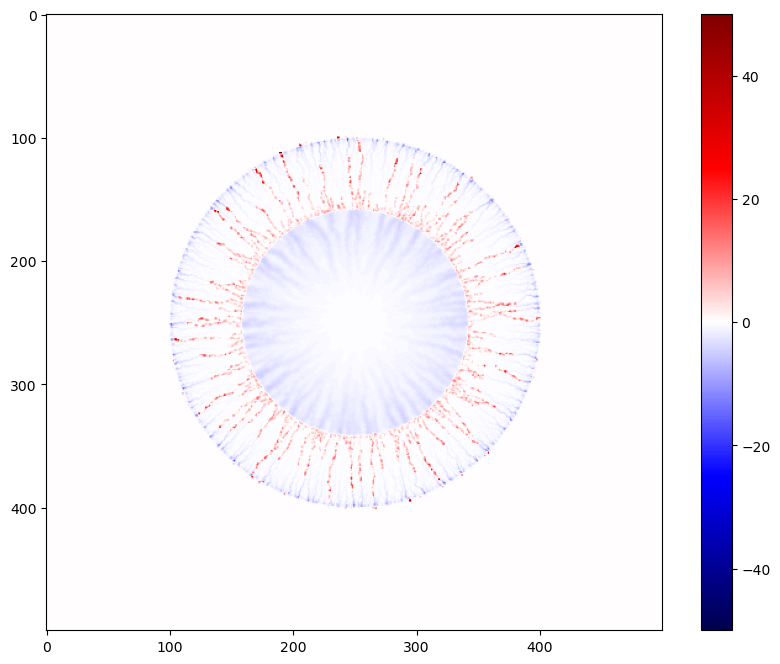

In [100]:
plt.figure(figsize=(10, 8))
plt.imshow(seddiff,cmap='seismic',vmin=-50,vmax=50)
plt.colorbar()

In [618]:
morpho.loadHDF5(timestep=0,discharge2=erosion2[:,0])
ero3 = morpho.discharge.copy()

In [619]:
ero2.max(),ero2.min(),ero2.shape

(0.0, -458.50424334921513, (500, 500))

In [61]:
ero3.max(),ero3.min(),ero3.shape

NameError: name 'ero3' is not defined

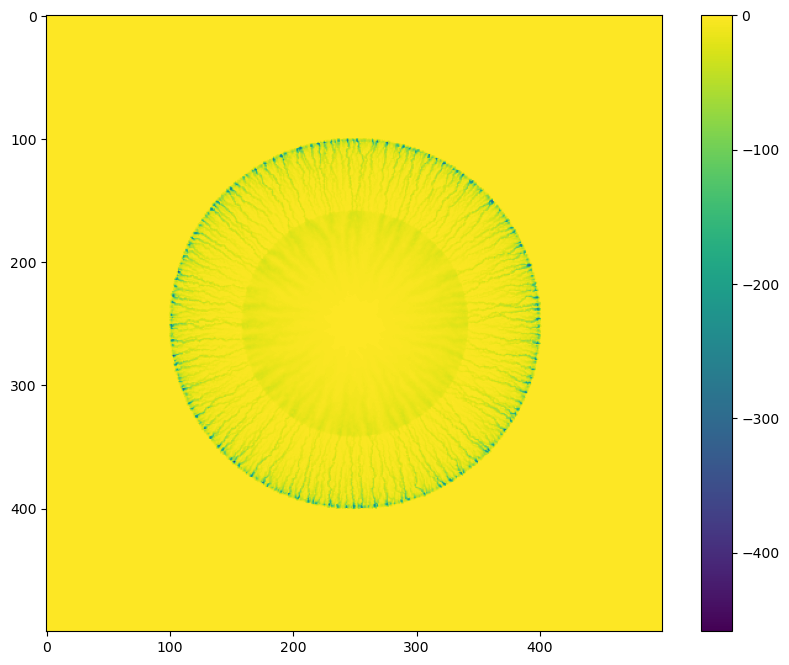

In [621]:
plt.figure(figsize=(10, 8))
plt.imshow(ero3)
plt.colorbar()

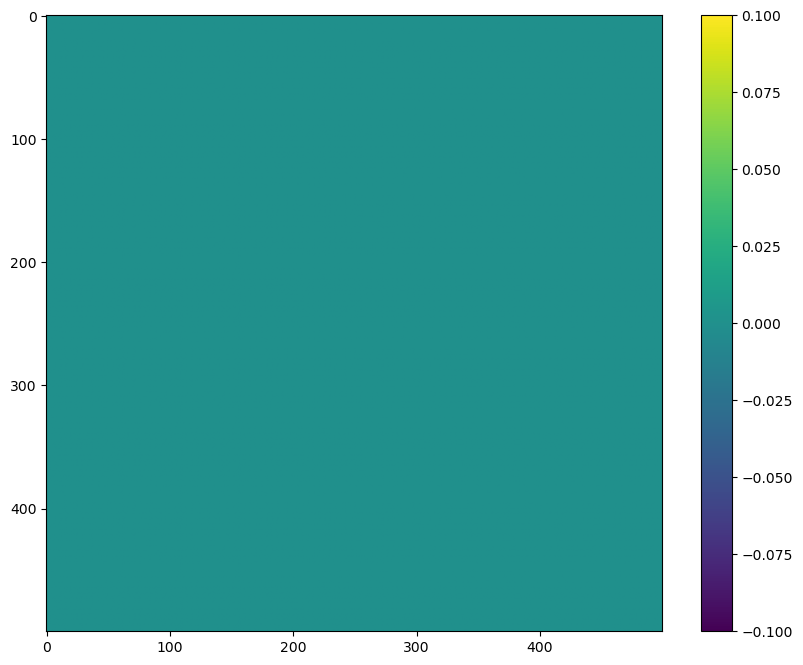

In [622]:
plt.figure(figsize=(10, 8))
plt.imshow(ero3-ero2)
plt.colorbar()

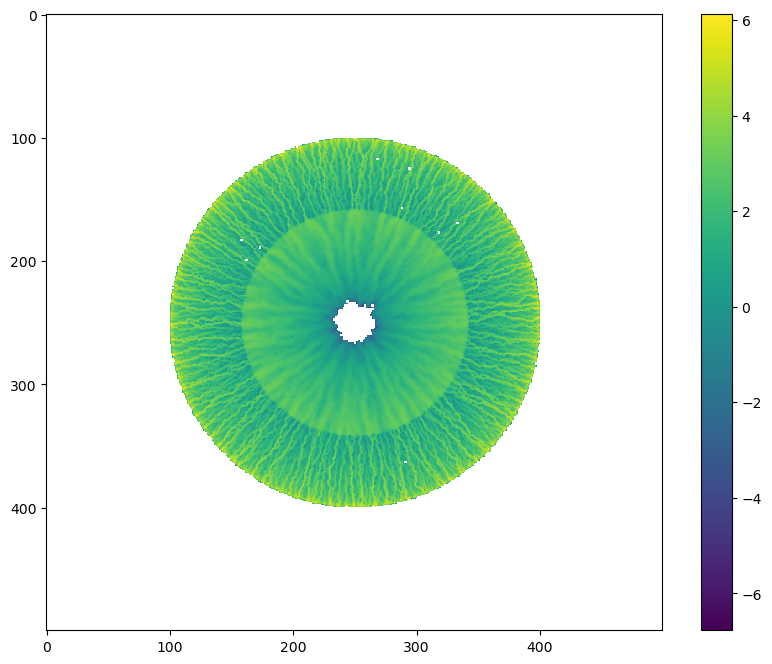

In [623]:
plt.figure(figsize=(10, 8))
plt.imshow(numpy.log((ero3 + 1)*-1))
plt.colorbar()

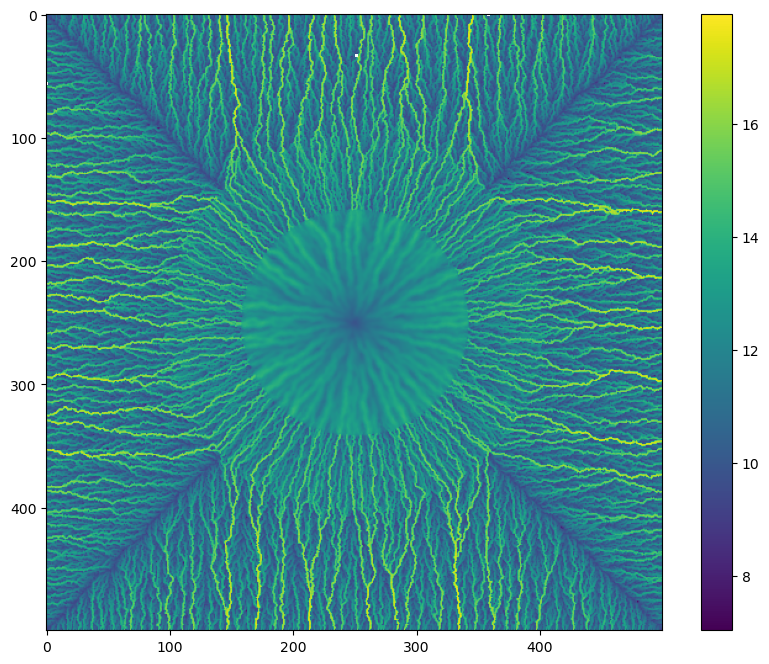

In [624]:
model.flow.discharge = FA_Total
morpho.loadHDF5(timestep=0,discharge2=model.flow.discharge)
dis = morpho.discharge.copy()
plt.figure(figsize=(10, 8))
plt.imshow(numpy.log(dis))
plt.colorbar()

### Visualizing Deposition

In [625]:
morpho.loadHDF5(timestep=0,discharge2=deposition[:,0])
depo_plot = morpho.discharge.copy()

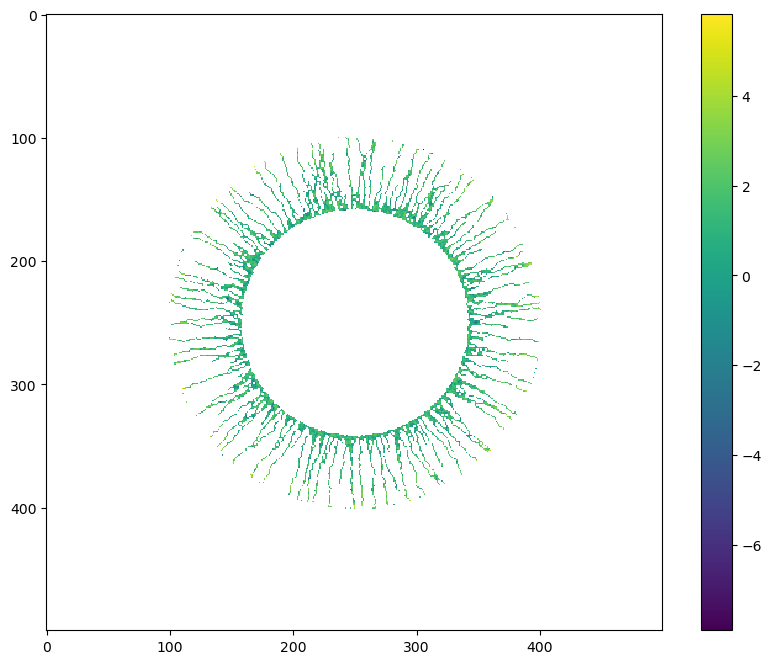

In [626]:
plt.figure(figsize=(10, 8))
plt.imshow(numpy.log(depo_plot))
r